In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn. metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.externals import joblib
from pathlib import Path
import pickle
from datetime import date
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.polynomial.polynomial import polyfit
from sympy import S, symbols, printing
%matplotlib inline

In [2]:
#This python script is performed assuming the streamflow data provided has already been converted to AF, 
#This aligns better with projection volumes from the BCA report


#set path to load historical data
Demand = pd.read_excel('C:/Users/Ryan/Box/Dissertation/Proposal/QualifyingExam/Data/Ann2.xlsx')

In [3]:
n = np.arange(228,300,4)
n=np.flip(n)
Demand['Trend']=n
Demand = Demand.set_index('Year')
Demand['Pred_AF']=np.nan
Demand['Trend2']=np.nan
Demand['Goal']=np.nan
Demand['Goal_AF']=np.nan
Demand['Goal'][2017]=210
Demand['Trend2'][2017]=228
Demand['Pred_AF'][2017]=86507
Demand['Goal_AF'][2017]=86507


C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added bac

In [4]:
#Demand = Demand.set_index('Year')
colnames=Demand.columns

Demand2=pd.DataFrame(columns=colnames)
Demand2['Year']=np.arange(2018,2041,1)

#observed trend to future
t2=np.arange(136,226,4)
t2=np.flip(t2)
Demand2.Trend2=t2

#Goals to future
g1=np.arange(189,210,1.75)
g1=np.flip(g1)
g2=np.arange(178,189,1)
g2=np.flip(g2)
g3=np.append(g1,g2)

Demand2['Goal']=g3

#Future populations
p2=np.arange(354000,444000,4065)
Demand2.Population=p2
             
#Predicted total water needs             
Demand2['Pred_AF']=Demand2.Population*Demand2.Trend2/892.7
Demand2['Goal_AF']=Demand2.Population*Demand2.Goal/892.7

Demand2=Demand2.set_index('Year')

Demand=Demand.append(Demand2)
Demand

,Ann_Dem_AF,Ann_gpcdOG,GPCD_Adj,Population,Trend,Pred_AF,Trend2,Goal,Goal_AF
Year,,,,,,,,,
2000,105991.60,314.336927,298.620080,300825.000,296,NaN,NaN,NaN,NaN
2001,109145.30,321.390877,305.321333,302976.800,292,NaN,NaN,NaN,NaN
2002,97570.80,285.282301,271.018186,305128.600,288,NaN,NaN,NaN,NaN
2003,91895.60,266.807318,253.466953,307280.400,284,NaN,NaN,NaN,NaN
2004,114814.43,331.031139,314.479582,309432.200,280,NaN,NaN,NaN,NaN
2005,88166.70,252.445316,239.823050,311584.000,276,NaN,NaN,NaN,NaN
2006,93572.70,266.086574,252.782246,313735.800,272,NaN,NaN,NaN,NaN
2007,98978.70,279.541986,265.564887,315887.600,268,NaN,NaN,NaN,NaN
2008,93680.90,262.789500,249.650025,318039.400,264,NaN,NaN,NaN,NaN


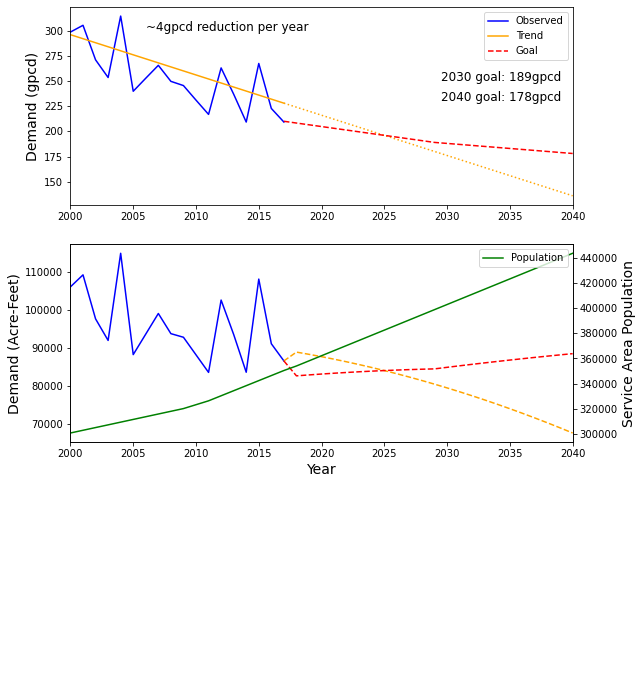

In [5]:
# Fit with polyfit
#b, m = polyfit(Demand.index, Demand['GPCD_Adj'], 1)

#b2, m2 = polyfit(Demand.index, Demand['Ann_Dem_AF'], 1)

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(9,8)
#fig=plt.figure(figsize=(8,8))

#fig=plt.figure(figsize=(5.5,3.5))
ax1.plot(Demand['GPCD_Adj'],label = 'Observed', color='blue')
ax1.plot(Demand.Trend,label = 'Trend', color='orange')
ax1.plot(Demand.Trend2, color = 'orange', linestyle=':')
ax1.plot(Demand.Goal, color = 'red', linestyle='--', label='Goal')
#ax1.plot(Demand.goal2040, color = 'black', linestyle='--',label='2040 Goal')
ax1.set_xlim(2000, 2040)
ax1.set_ylabel('Demand (gpcd)', fontsize=14)
#ax1.set_xlabel('Year', fontsize=14)
#ax1.plot(Demand.index, b + m * Demand.index, '-', label = 'Trend')
ax1.annotate('~4gpcd reduction per year', xy=(2006, 300),  size=12)
ax1.annotate('2030 goal: 189gpcd', xy=(2029.5, 250),  size=12)
ax1.annotate('2040 goal: 178gpcd', xy=(2029.5, 230),  size=12)


ax1.legend()
#plt.show()

ax2.plot(Demand['Ann_Dem_AF'], color='blue')
ax2.plot(Demand['Pred_AF'], linestyle='--', color='orange', label = 'Observed')
ax2.plot(Demand['Goal_AF'], linestyle='--', color='red', label = 'Goal')

ax2.set_xlim(2000, 2040)
ax2.set_ylabel('Demand (Acre-Feet)', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
#ax2.plot(Demand.index, b2 + m2 * Demand.index, '-', label = 'Trend')
ax2.annotate('~4gpcd reduction per year', xy=(2006, 280),  size=12)
#ax2.legend()
ax3=ax2.twinx()
ax3.plot(Demand.index, Demand.Population, color='Green', label='Population')
ax3.set_ylabel('Service Area Population', size=14)
ax3.legend(loc='upper right')
fig.savefig('C:/Users/Ryan/Box/Dissertation/Paper3/Figures/gpcdTrend.png')
fig.savefig('C:/Users/Ryan/Box/Dissertation/Paper3/Figures/gpcdTrend.pdf')

In [6]:
#This python script is performed assuming the streamflow data provided has already been converted to AF, 
#This aligns better with projection volumes from the BCA report


#set path to load historical data
Demand = pd.read_excel('C:/Users/Ryan/Box/Dissertation/Proposal/QualifyingExam/Data/Ann2.xlsx')

n = np.arange(228,300,4)
n=np.flip(n)
Demand['Trend']=n
Demand = Demand.set_index('Year')
Demand['Pred_AF']=np.nan
Demand['Trend2']=np.nan
Demand['Goal']=np.nan
Demand['Goal_AF']=np.nan
Demand['Goal'][2017]=210
Demand['Trend2'][2017]=228
Demand['Pred_AF'][2017]=86507
Demand['Goal_AF'][2017]=86507


C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Setting

In [7]:
len(Demand2)

23

In [8]:
#Demand = Demand.set_index('Year')
colnames=Demand.columns

Demand2=pd.DataFrame(columns=colnames)
Demand2['Year']=np.arange(2018,2066,1)



#Goals to future
g1=np.arange(189,210,1.75)
g1=np.flip(g1)
g2=np.arange(178,189,1.1)
g2=np.flip(g2)
g3=np.arange(169,178,0.35)
g3=np.flip(g3)

g4=np.append(g1,g2)
g4=np.append(g4,g3)
Demand2['Goal']=g4

#Future populations
p2=np.arange(354000,526478,3668)
Demand2.Population=p2
             
#Predicted total water needs             
#Demand2['Pred_AF']=Demand2.Population*Demand2.Trend2/892.7
Demand2['Goal_AF']=Demand2.Population*Demand2.Goal/892.7

Demand2=Demand2.set_index('Year')

Demand=Demand.append(Demand2)
Demand['SWR']=41000
Demand['SWR_GW']=58900
Demand['Cur_WR']=97800

Demand

,Ann_Dem_AF,Ann_gpcdOG,GPCD_Adj,Population,Trend,Pred_AF,Trend2,Goal,Goal_AF,SWR,SWR_GW,Cur_WR
Year,,,,,,,,,,,,
2000,105991.60,314.336927,298.620080,300825.0,296,NaN,NaN,NaN,NaN,41000,58900,97800
2001,109145.30,321.390877,305.321333,302976.8,292,NaN,NaN,NaN,NaN,41000,58900,97800
2002,97570.80,285.282301,271.018186,305128.6,288,NaN,NaN,NaN,NaN,41000,58900,97800
2003,91895.60,266.807318,253.466953,307280.4,284,NaN,NaN,NaN,NaN,41000,58900,97800
2004,114814.43,331.031139,314.479582,309432.2,280,NaN,NaN,NaN,NaN,41000,58900,97800
...,...,...,...,...,...,...,...,...,...,...,...,...
2061,NaN,NaN,NaN,511724.0,NaN,NaN,NaN,170.40,97678.693402,41000,58900,97800
2062,NaN,NaN,NaN,515392.0,NaN,NaN,NaN,170.05,98176.777865,41000,58900,97800
2063,NaN,NaN,NaN,519060.0,NaN,NaN,NaN,169.70,98671.986110,41000,58900,97800


In [9]:
Demand.head(31)

,Ann_Dem_AF,Ann_gpcdOG,GPCD_Adj,Population,Trend,Pred_AF,Trend2,Goal,Goal_AF,SWR,SWR_GW,Cur_WR
Year,,,,,,,,,,,,
2000,105991.60,314.336927,298.620080,300825.000,296,NaN,NaN,NaN,NaN,41000,58900,97800
2001,109145.30,321.390877,305.321333,302976.800,292,NaN,NaN,NaN,NaN,41000,58900,97800
2002,97570.80,285.282301,271.018186,305128.600,288,NaN,NaN,NaN,NaN,41000,58900,97800
2003,91895.60,266.807318,253.466953,307280.400,284,NaN,NaN,NaN,NaN,41000,58900,97800
2004,114814.43,331.031139,314.479582,309432.200,280,NaN,NaN,NaN,NaN,41000,58900,97800
2005,88166.70,252.445316,239.823050,311584.000,276,NaN,NaN,NaN,NaN,41000,58900,97800
2006,93572.70,266.086574,252.782246,313735.800,272,NaN,NaN,NaN,NaN,41000,58900,97800
2007,98978.70,279.541986,265.564887,315887.600,268,NaN,NaN,NaN,NaN,41000,58900,97800
2008,93680.90,262.789500,249.650025,318039.400,264,NaN,NaN,NaN,NaN,41000,58900,97800


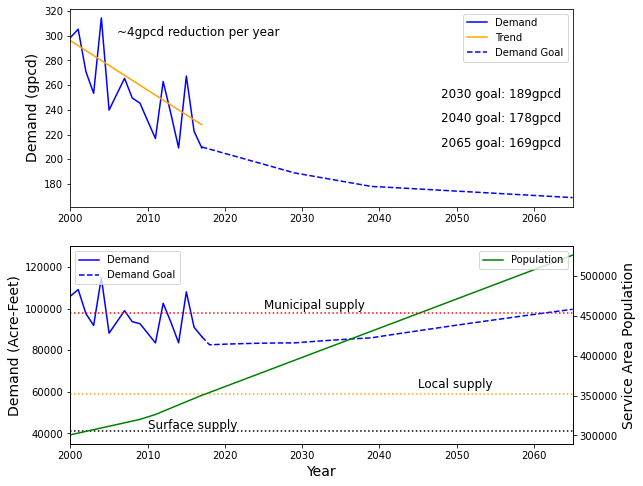

In [10]:
# Fit with polyfit
#b, m = polyfit(Demand.index, Demand['GPCD_Adj'], 1)

#b2, m2 = polyfit(Demand.index, Demand['Ann_Dem_AF'], 1)

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(9,8)
#fig=plt.figure(figsize=(8,8))

#fig=plt.figure(figsize=(5.5,3.5))


ax1.plot(Demand['GPCD_Adj'],label = 'Demand', color='blue')
ax1.plot(Demand.Trend,label = 'Trend', color='orange')
#ax1.plot(Demand.Trend2, color = 'orange', linestyle=':')
ax1.plot(Demand.Goal, color = 'blue', linestyle='--', label='Demand Goal')
#ax1.plot(Demand.goal2040, color = 'black', linestyle='--',label='2040 Goal')
ax1.set_xlim(2000, 2065)
ax1.set_ylabel('Demand (gpcd)', fontsize=14)
#ax1.set_xlabel('Year', fontsize=14)
#ax1.plot(Demand.index, b + m * Demand.index, '-', label = 'Trend')
ax1.annotate('~4gpcd reduction per year', xy=(2006, 300),  size=12)
ax1.annotate('2030 goal: 189gpcd', xy=(2048, 250),  size=12)
ax1.annotate('2040 goal: 178gpcd', xy=(2048, 230),  size=12)
ax1.annotate('2065 goal: 169gpcd', xy=(2048, 210),  size=12)


ax1.legend()
#plt.show()

ax2.plot(Demand['Ann_Dem_AF'], color='blue', label='Demand')
#ax2.plot(Demand['Pred_AF'], linestyle=':', color='orange', label = 'Demand')
ax2.plot(Demand['Goal_AF'], linestyle='--', color='blue', label = 'Demand Goal')
ax2.plot(Demand.SWR, color='k', linestyle=':')
ax2.plot(Demand.SWR_GW, color='orange', linestyle=':' )
ax2.plot(Demand.Cur_WR, color='r', linestyle=':')


ax2.set_xlim(2000, 2065)
ax2.set_ylim(35000,130000)
ax2.set_ylabel('Demand (Acre-Feet)', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
#ax2.plot(Demand.index, b2 + m2 * Demand.index, '-', label = 'Trend')
ax2.annotate('Surface supply', xy=(2010, 42000),  size=12)
ax2.annotate('Local supply', xy=(2045, 62000),  size=12)
ax2.annotate('Municipal supply', xy=(2025, 100000),  size=12)
ax2.legend(loc='upper left')


ax3=ax2.twinx()
ax3.plot(Demand.index, Demand.Population, color='Green', label='Population')
ax3.set_ylabel('Service Area Population', size=14)
ax3.legend(loc='upper right')


fig.savefig('C:/Users/Ryan/Box/Dissertation/Paper3/Figures/gpcdTrend2.png')
fig.savefig('C:/Users/Ryan/Box/Dissertation/Paper3/Figures/gpcdTrend2.pdf')

In [11]:
#This python script is performed assuming the streamflow data provided has already been converted to AF, 
#This aligns better with projection volumes from the BCA report


#set path to load historical data
Demand = pd.read_excel('C:/Users/Ryan/Box/Dissertation/Proposal/QualifyingExam/Data/Ann2.xlsx')

n = np.arange(228,300,4)
n=np.flip(n)
Demand['Trend']=n
Demand = Demand.set_index('Year')
Demand['Pred_AF']=np.nan
Demand['Trend2']=np.nan
Demand['Goal']=np.nan
Demand['Goal_2030']=83766
Demand['Goal_2040']=86554
Demand['Goal_2065']=99653
Demand['Trend2'][2017]=228



C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
#Demand = Demand.set_index('Year')
colnames=Demand.columns

Demand2=pd.DataFrame(columns=colnames)
Demand2['Year']=np.arange(2018,2066,1)

Demand2['Goal_2030']=83766
Demand2['Goal_2040']=86554
Demand2['Goal_2065']=99653



#Goals to future
g1=np.arange(189,210,1.75)
g1=np.flip(g1)
g2=np.arange(178,189,1.1)
g2=np.flip(g2)
g3=np.arange(169,178,0.35)
g3=np.flip(g3)

g4=np.append(g1,g2)
g4=np.append(g4,g3)
Demand2['Goal']=g4

#Future populations
p2=np.arange(354000,526478,3668)
Demand2.Population=p2
             
#Predicted total water needs             
#Demand2['Pred_AF']=Demand2.Population*Demand2.Trend2/892.7



Demand2=Demand2.set_index('Year')

Demand=Demand.append(Demand2)

Demand['Goal_2030gpcd']=Demand.Goal_2030/Demand.Population*892.7
Demand['Goal_2040gpcd']=Demand.Goal_2040/Demand.Population*892.7
Demand['Goal_2065gpcd']=Demand.Goal_2065/Demand.Population*892.7

Demand

,Ann_Dem_AF,Ann_gpcdOG,GPCD_Adj,Population,Trend,Pred_AF,Trend2,Goal,Goal_2030,Goal_2040,Goal_2065,Goal_2030gpcd,Goal_2040gpcd,Goal_2065gpcd
Year,,,,,,,,,,,,,,
2000,105991.60,314.336927,298.620080,300825.0,296,NaN,NaN,NaN,83766,86554,99653,248.576110,256.849516,295.720878
2001,109145.30,321.390877,305.321333,302976.8,292,NaN,NaN,NaN,83766,86554,99653,246.810674,255.025321,293.620611
2002,97570.80,285.282301,271.018186,305128.6,288,NaN,NaN,NaN,83766,86554,99653,245.070138,253.226855,291.549966
2003,91895.60,266.807318,253.466953,307280.4,284,NaN,NaN,NaN,83766,86554,99653,243.353980,251.453577,289.508322
2004,114814.43,331.031139,314.479582,309432.2,280,NaN,NaN,NaN,83766,86554,99653,241.661689,249.704962,287.495074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,NaN,NaN,NaN,511724.0,NaN,NaN,NaN,170.40,83766,86554,99653,146.129375,150.993027,173.844168
2062,NaN,NaN,NaN,515392.0,NaN,NaN,NaN,170.05,83766,86554,99653,145.089385,149.918423,172.606934
2063,NaN,NaN,NaN,519060.0,NaN,NaN,NaN,169.70,83766,86554,99653,144.064093,148.859006,171.387187


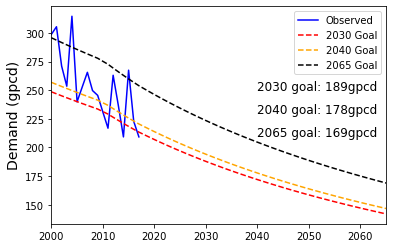

In [13]:
# Fit with polyfit
#b, m = polyfit(Demand.index, Demand['GPCD_Adj'], 1)

#b2, m2 = polyfit(Demand.index, Demand['Ann_Dem_AF'], 1)

#fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(9,5)
#fig=plt.figure(figsize=(8,8))

#fig=plt.figure(figsize=(5.5,3.5))


plt.plot(Demand['GPCD_Adj'],label = 'Observed', color='blue')
plt.plot(Demand.Goal_2030gpcd,label = '2030 Goal', color='red', linestyle = '--')
plt.plot(Demand.Goal_2040gpcd,label= '2040 Goal', color = 'orange', linestyle='--')
plt.plot(Demand.Goal_2065gpcd, label = '2065 Goal', color = 'black', linestyle='--')
#ax1.plot(Demand.goal2040, color = 'black', linestyle='--',label='2040 Goal')
plt.xlim(2000, 2065)
plt.ylabel('Demand (gpcd)', fontsize=14)
#ax1.set_xlabel('Year', fontsize=14)
#ax1.plot(Demand.index, b + m * Demand.index, '-', label = 'Trend')
#plt.annotate('~4gpcd reduction per year', xy=(2006, 300),  size=12)
plt.annotate('2030 goal: 189gpcd', xy=(2040, 250),  size=12)
plt.annotate('2040 goal: 178gpcd', xy=(2040, 230),  size=12)
plt.annotate('2065 goal: 169gpcd', xy=(2040, 210),  size=12)


plt.legend()

plt.savefig('C:/Users/Ryan/Box/Dissertation/Paper3/Figures/gpcdTrend3.png')
plt.savefig('C:/Users/Ryan/Box/Dissertation/Paper3/Figures/gpcdTrend3.pdf')

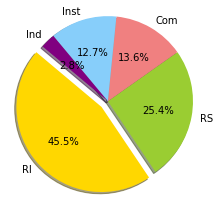

In [14]:
# Data to plot
labels = 'RI', 'RS', 'Com', 'Inst', 'Ind'
sizes = [97, 54, 29, 27, 6]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

# Plot
fig=plt.figure(figsize=(3.5,3.5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('C:/Users/Ryan/Box/Dissertation/Proposal/QualifyingExam/pie.png')
plt.savefig('C:/Users/Ryan/Box/Dissertation/Proposal/QualifyingExam/pie.pdf')

In [53]:
#fig, (ax1, ax2) = plt.subplots(1,2)
#fig.set_size_inches(8,5)
fig=plt.figure(figsize=(8.5,3.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
gs.update(wspace=0.3)

ax0=plt.subplot(gs[0])
#Make the line plot
Demand['Ann_gpcd'].plot(kind='line', y='gpcd', color= 'blue',ax=ax0, label = 'Observed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel('Demand (gpcd)', fontsize=14)
#ax1.set_title('Modeled vs Observed Outdoor Demands', fontsize=16)
#ax.set_xticks(np.arange(min(x), max(x)+1, 10))
ax0.set_xlabel('Date', fontsize = 14)
ax0.legend(fontsize=12)
plt.annotate('A', xy=('6-1-2007', 475),  size=18)


ax1=plt.subplot(gs[1])
sizes.plot(kind='pie', x='gpcd', y='gpcd_pred', color= 'blue',ax=ax1)
pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.plot([0,500],[0,500], color='red')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Predicted (gpcd)', fontsize=14)
#ax2.set_title('Modeled vs Observed Outdoor Demands', fontsize=16)
#ax.set_xticks(np.arange(min(x), max(x)+1, 10))
ax1.set_xlabel('Observed (gpcd)', fontsize = 14)
ax1.legend(fontsize=12)
plt.gca().get_legend().remove()
plt.annotate('B', xy=(10, 475),  size=18)


#plt.savefig('../Figures/Demand/Mod_Obs.png')
#plt.savefig('../Figures/Demand/Mod_Obs.pdf')

KeyError: 'OD'

ConversionError: Failed to convert value(s) to axis units: '6-1-2007'

<Figure size 612x252 with 2 Axes>